In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('dataset/ISEAR.csv')
df_original.to_csv("dataset/comments.csv", header=["Index", "Sentiment", "Comment"], index = False)

In [3]:
df_comments =  pd.read_csv('dataset/comments.csv')

In [4]:
df_comments.shape

(7445, 3)

In [5]:
#expanding the dispay of text column
pd.set_option('display.max_colwidth', -1)

#using only Sentiment and Comment
df_comments = df_comments [['Sentiment','Comment']]
df_comments.head()

,Sentiment,Comment
0,fear,"Every time I imagine that someone I love or I could contact a \nserious illness, even death."
1,anger,When I had been obviously unjustly treated and had no possibility \nof elucidating this.
2,sadness,When I think about the short time that we live and relate it to \nthe periods of my life when I think that I did not use this \nshort time.
3,disgust,At a gathering I found myself involuntarily sitting next to two \npeople who expressed opinions that I considered very low and \ndiscriminating.
4,shame,When I realized that I was directing the feelings of discontent \nwith myself at my partner and this way was trying to put the blame \non him instead of sorting out my own feeliings.


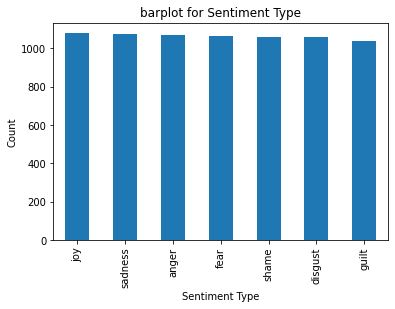

In [6]:
df_comments['Sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.title('barplot for Sentiment Type')
plt.show()

the dataset is balanced

In [7]:
import re
import nltk
from nltk.corpus import stopwords
import string
string.punctuation


from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/mamata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#text preprocessing

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess_text(text,remove_stop_words=True, lemmatize_words=True):
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(" \d+", " ", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.replace("\n", " ")
    text = "".join([i for i in text if i not in string.punctuation])
    
     # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
#     Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        stem_text = [stemmer.stem(w) for w in text]
#         lemmatized_words = [lemmatizer.lemmatize(word) for word in stem_text]
        text = " ".join(stem_text)


    return text

In [9]:
df_comments['clean_comment']= df_comments['Comment'].apply(lambda x:preprocess_text(x))

In [10]:
#split features and target from train data 
X = df_comments["clean_comment"]
y = df_comments["Sentiment"]

In [11]:
#imports

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [12]:

# split data into train and validate
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape)
print(X_test.shape)

(5956,)
(1489,)


In [13]:
# Encode for string target labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [14]:
list(label_encoder.classes_)

['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']

In [15]:
label_encoder.transform(['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame'])

array([0, 1, 2, 3, 4, 5, 6])

# parameter tuning for tfidf vectorization

# for n gram

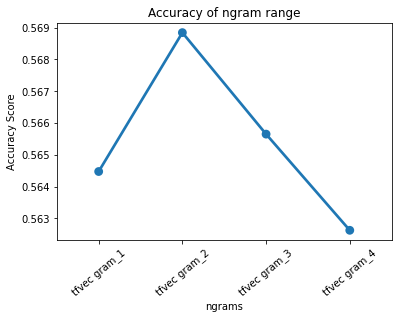

In [16]:
from sklearn.model_selection import cross_val_score


lr = LogisticRegression(random_state=1)

def count_vec_ngram(params, X_train, y_train):
    cvec_p = TfidfVectorizer(ngram_range=(params)) 

    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)

    # cross val score/ predict
    cvec_score_p = cross_val_score(lr, X_train_cvec_p, y_train, cv=3)

    # cross validation 
    return cvec_score_p.mean()

params = [(1,1), (1,2),(1,3), (1,4)] 
ngram_scores = []
for p in params:
    ngram_scores.append(count_vec_ngram(p, X_train, y_train))
    
ngrams = ['tfvec gram_1','tfvec gram_2','tfvec gram_3','tfvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])


# plot scores on graph
sns.pointplot(x='params', y='scores', data = ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.title('Accuracy of ngram range')
plt.show()


# for max feature

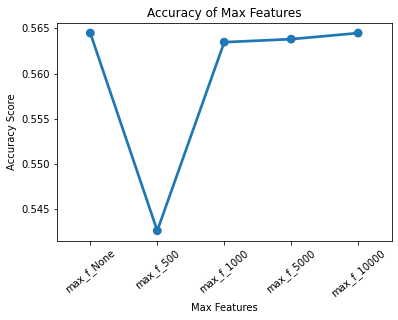

In [17]:
def count_vec_max_features(params, X_train, y_train):
    
    cvec_p = TfidfVectorizer(max_features=(params)) 

    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)

    # cross val score/ predict
    cvec_score_p = cross_val_score(lr, X_train_cvec_p, y_train, cv=3)

    # cross validation 
    return cvec_score_p.mean()

mf_params = [None, 500, 1000, 5000, 10000]
max_features_scores = [count_vec_max_features(p, X_train, y_train) for p in mf_params]
max_features = ['max_f_'+str(p) for p in mf_params]

# dataframe for scores
max_features_df = pd.DataFrame({'params':max_features, 'scores':max_features_scores}, index=[0,1,2,3,4])

sns.pointplot(x='params', y='scores', data =max_features_df)
plt.ylabel('Accuracy Score')
plt.xlabel('Max Features')
plt.xticks(rotation=40)
plt.title('Accuracy of Max Features')
plt.show()

# for max_df

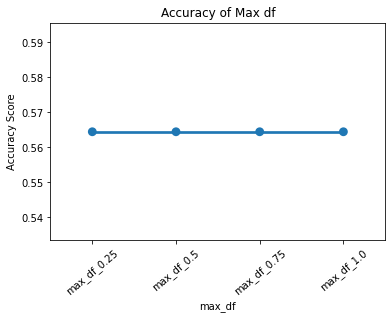

In [18]:
def count_vec_max_df(params, X_train, y_train):
    cvec_p = TfidfVectorizer(max_df=params) 

    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)

    # cross val score/ predict
    cvec_score_p = cross_val_score(lr, X_train_cvec_p, y_train, cv=3)

    # cross validation 
    return cvec_score_p.mean()

mdf_params = [0.25, 0.5, 0.75, 1.0]
max_df_scores = [count_vec_max_df(p, X_train, y_train) for p in mdf_params]
max_df = ['max_df_'+str(p) for p in mdf_params]

# dataframe for scores
max_df_df = pd.DataFrame({'params':max_df, 'scores':max_df_scores}, index=[0,1,2,3])

sns.pointplot(x='params', y='scores', data =max_df_df)
plt.ylabel('Accuracy Score')
plt.xlabel('max_df')
plt.xticks(rotation=40)
plt.title('Accuracy of Max df')
plt.show()

# for min_df

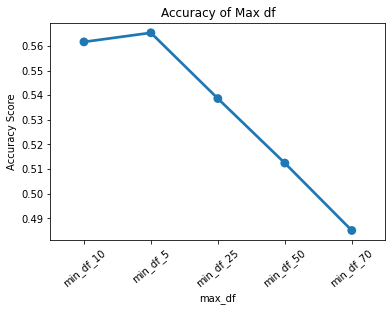

In [19]:
def count_vec_min_df(params, X_train, y_train):
    
    cvec_p = TfidfVectorizer(min_df=params) 

    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)

    # cross val score/ predict
    cvec_score_p = cross_val_score(lr, X_train_cvec_p, y_train, cv=3)

    # cross validation 
    return cvec_score_p.mean()

mdf_params = [10,5,25,50,70]
min_df_scores = [count_vec_min_df(p, X_train, y_train) for p in mdf_params]
min_df = ['min_df_'+str(p) for p in mdf_params]

# dataframe for scores
min_df_df = pd.DataFrame({'params':min_df, 'scores':min_df_scores}, index=[0,1,2,3,4])

sns.pointplot(x='params', y='scores', data =min_df_df)
plt.ylabel('Accuracy Score')
plt.xlabel('max_df')
plt.xticks(rotation=40)
plt.title('Accuracy of Max df')
plt.show()

In [20]:
# Transform features with tfidf using params from fine tuning above

tfvec_p = TfidfVectorizer(ngram_range=(1,2),max_features=10000,max_df=0.9,min_df=5)

tfvec_p.fit(X_train)

X_train_tfvec_p = tfvec_p.transform(X_train)
processed_input

In [21]:
#saving the idf values 

import pickle
pickle.dump(tfvec_p, open("features/features.pkl", "wb"))

# Visualization 

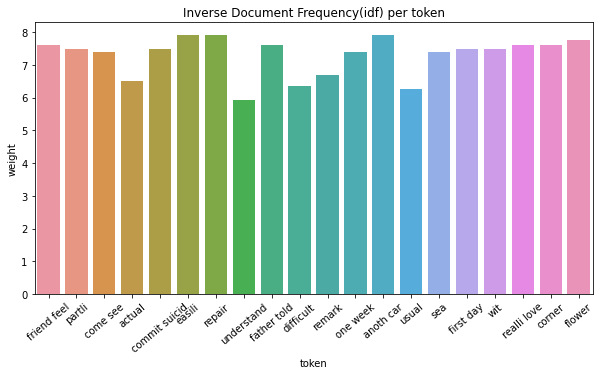

In [22]:
idf = tfvec_p.idf_
rr = dict(zip(tfvec_p.get_feature_names(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 
token_weight_sample = token_weight.sample(n=20)

sns.barplot(x='token', y='weight', data=token_weight_sample)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=40)
plt.show()

In [23]:
# get feature names
feature_names = np.array(tfvec_p.get_feature_names())
sorted_by_idf = np.argsort(tfvec_p.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:7]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-7:]]))

Features with lowest idf:
['friend' 'felt' 'one' 'time' 'go' 'day' 'got']

Features with highest idf:
['counter' 'gang' 'function' 'fulfil promis' 'front peopl' 'tape'
 'exam first']


In [24]:

# find maximum value for each of the features over all of dataset:
max_val = X_train_tfvec_p.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:7]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-7:]]))

Features with lowest tfidf:
['summer vacat' 'came ask' 'loudli' 'felt realli' 'dare' 'spiritu'
 'next morn']

Features with highest tfidf: 
['exam' 'homework' 'camp' 'meal' 'examin' 'rel' 'applic']


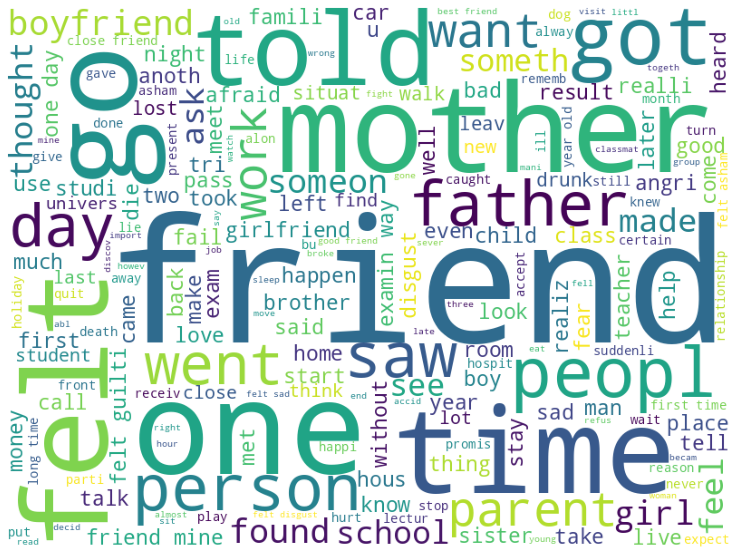

In [25]:
from wordcloud import WordCloud, STOPWORDS

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

cloud(' '.join(df_comments['clean_comment']))

# Grid Search on Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve

lr_params = {'penalty': ['l1','l2'],
          'solver':['liblinear'],
          'C': np.logspace(-10,10,21)}

# Define the gridsearchCV
lr_grid = GridSearchCV(lr, param_grid = lr_params, cv=3, n_jobs=-1, verbose=1)

# fit with the tranformed sparse matrix
lr_grid.fit(X_train_tfvec_p, y_train)

print ('Best Score:', lr_grid.best_score_)


# assign the best estimator to a variable
best_lr = lr_grid.best_estimator_
print ('Best Params:', lr_grid.best_params_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Best Score: 0.5703509791039374
Best Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [27]:
# test model performance on test data 
y_predscv= best_lr.predict(X_test_tfvec_p)
accuracy_score(y_test,y_predscv)

0.5963734049697784

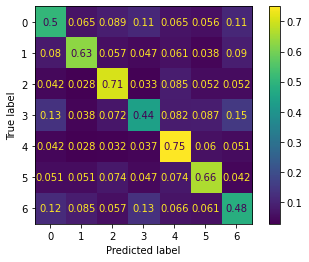

In [28]:
# plot the comfusion matrix
axes = plot_confusion_matrix(best_lr, X_test_tfvec_p, y_test, normalize='true')
classes = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
plt.show()

In [29]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
# print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,y_predscv))  
print(accuracy_score(y_test, y_predscv))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       214
           1       0.68      0.63      0.65       212
           2       0.65      0.71      0.68       212
           3       0.51      0.44      0.47       208
           4       0.64      0.75      0.69       216
           5       0.65      0.66      0.66       215
           6       0.50      0.48      0.49       212

    accuracy                           0.60      1489
   macro avg       0.59      0.60      0.59      1489
weighted avg       0.59      0.60      0.59      1489

0.5963734049697784


In [30]:
#saving the model
#save model 
import joblib 

joblib.dump(best_lr, 'models/sentiment_model.pkl')

['models/sentiment_model.pkl']

# Visualization

In [31]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    
    
    for i, class_label in enumerate(class_labels):
#         output the original index of the top 10 coef
        top10 = np.argsort(clf.coef_[i])[-10:]

        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [32]:
feature_df = pd.DataFrame()
feature_names = tfvec_p.get_feature_names()
sentiments_class = {0: "Anger", 1: "Disgust",2: "Fear",3:"Guilt",4:"Joy",5:"Sadness",6:"Shame"}

for i, class_label in enumerate([0,1,2,3,4,5,6]):

    index = np.argsort(best_lr.coef_[i])
    
    feature_df['feature_names'] = [feature_names[j] for j in index]
    
    class_ = best_lr.coef_[i]
    
    feature_df[sentiments_class[i]] = np.abs(class_)
        
feature_df.head(10)

,feature_names,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame
0,disgust,0.575316,0.258181,0.353534,0.408256,0.394740,0.122898,0.435523
1,sad,0.813313,1.016322,0.182139,1.377965,0.271464,0.135455,0.513651
2,guilti,0.161811,0.243299,0.093021,1.164796,0.267610,0.245333,0.375803
3,die,0.452235,0.373147,0.520961,0.298270,0.917582,0.064063,0.096375
4,angri,0.155867,0.249881,0.177664,0.065096,0.368228,0.224545,0.118215
5,heard,0.051916,0.177660,0.352500,0.105048,0.047582,0.051369,0.685957
6,felt guilti,0.371634,0.969588,0.157999,0.432805,0.080481,0.064595,0.376530
7,happi,0.297783,0.011070,0.296345,0.276757,0.060149,0.118723,0.079047
8,joy,0.379309,1.197945,1.084406,0.518351,3.458033,0.568868,1.058977
9,fear,0.370854,0.343563,0.156817,0.205588,0.776685,0.283385,0.237038


In [33]:
joy_abs_10 = feature_df.sort_values('Joy', ascending=False).head(10)
sadness_abs_10 = feature_df.sort_values('Sadness', ascending=False).head(10)
anger_abs_10 = feature_df.sort_values('Anger', ascending=False).head(10)
disgust_abs_10 = feature_df.sort_values('Disgust', ascending=False).head(10)
fear_abs_10 = feature_df.sort_values('Fear', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 joy class Features Comparing to Other Classes')

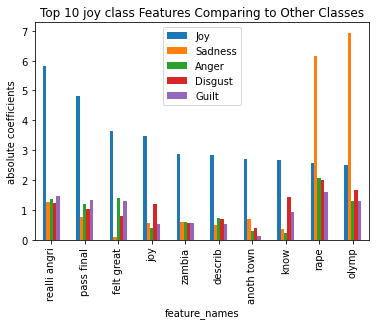

In [34]:
joy_abs_10.plot(x="feature_names", y=["Joy", "Sadness", "Anger","Disgust","Guilt"], kind="bar")
plt.ylabel('absolute coefficients')
plt.title('Top 10 joy class Features Comparing to Other Classes')
# print_top10(tfvec_p, best_lr, [0,1,2])

Text(0.5, 1.0, 'Top 10 sadness class Features Comparing to Other Classes')

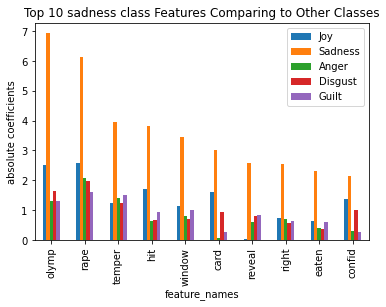

In [35]:
sadness_abs_10.plot(x="feature_names", y=["Joy", "Sadness", "Anger","Disgust","Guilt"], kind="bar")
plt.ylabel('absolute coefficients')
plt.title('Top 10 sadness class Features Comparing to Other Classes')

Text(0.5, 1.0, 'Top 10 anger class Features Comparing to Other Classes')

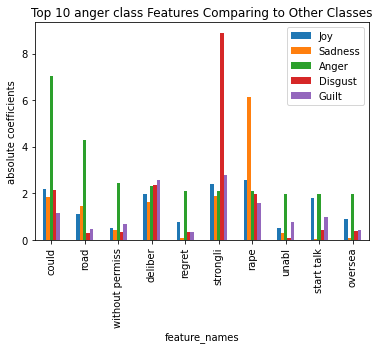

In [36]:
anger_abs_10.plot(x="feature_names", y=["Joy", "Sadness", "Anger","Disgust","Guilt"], kind="bar")
plt.ylabel('absolute coefficients')
plt.title('Top 10 anger class Features Comparing to Other Classes')

Text(0.5, 1.0, 'Top 10 disgust class Features Comparing to Other Classes')

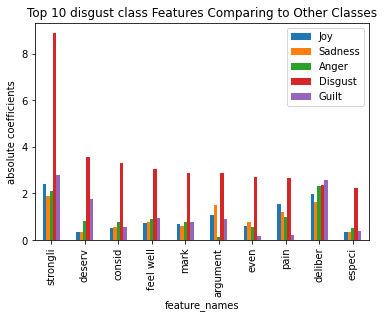

In [37]:
disgust_abs_10.plot(x="feature_names", y=["Joy", "Sadness", "Anger","Disgust","Guilt"], kind="bar")
plt.ylabel('absolute coefficients')
plt.title('Top 10 disgust class Features Comparing to Other Classes')

Text(0.5, 1.0, 'Top 10 joy class Features Comparing to Other Classes')

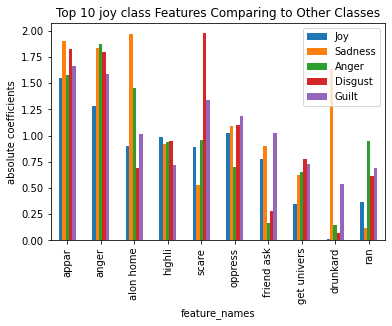

In [38]:
fear_abs_10.plot(x="feature_names", y=["Joy", "Sadness", "Anger","Disgust","Guilt"], kind="bar")
plt.ylabel('absolute coefficients')
plt.title('Top 10 joy class Features Comparing to Other Classes')
# print_top10(tfvec_p, best_lr, [0,1,2])

In [39]:
#testing input

input = "i am feeling very happy today. All my dreams have come true."

processed_input = preprocess_text(input)

In [40]:
processed_input

'feel happi today dream come true'

In [45]:
inpt_vec = tfvec_p.transform([processed_input])

In [47]:
inpt_vec.shape

(1, 2274)

In [75]:
prediction = best_lr.predict(inpt_vec)
sentiments = {0: "Anger", 1: "Disgust",2: "Fear",3:"Guilt",4:"Joy",5:"Sadness",6:"Shame"}

print(sentiments[prediction[0]])

Joy


In [76]:
X_test_tfvec_p.shape

(1489, 2274)

In [77]:

# pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)

df_feature = pd.DataFrame(X_test_tfvec_p.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1 + X_test.shape[0])],
             columns=tfvec_p.get_feature_names())
# df_feature.tail(10)
df_feature.sample(n = 3)

,abil,abl,abl help,abroad,absenc,absolut,abus,academ,accept,accept student,accept univers,accid,accident,accompani,accomplish,account,accus,achiev,acquaint,acquaint mine,across,act,action,activ,actual,addit,address,admiss,admit,admit hospit,admit univers,advanc,affair,affect,afraid,afraid might,afraid would,africa,afternoon,afterward,age,aggress,ago,agre,agreement,ahead,aid,air,airport,alcohol,aliv,allow,almost,alon,alon dark,alon home,alon hous,alon night,along,along road,alreadi,also,also friend,although,alway,american,among,amount,amus,anatomi,anger,angri,angri friend,angrili,anim,announc,annoy,anoth,anoth boy,anoth car,anoth friend,anoth girl,anoth guy,anoth man,anoth one,anoth person,anoth town,anoth woman,answer,answer question,anxieti,anxiou,anybodi,anymor,anyon,anyth,anyway,apart,apolog,appar,appar reason,appart,appear,appli,applic,appoint,appreci,approach,approv,area,argu,argument,argument friend,arm,armi,around,arrang,arrest,arriv,arriv home,arriv late,articl,asham,asian,asian olymp,ask,ask go,ask permiss,ask question,ask someth,assault,assign,assist,associ,assult,ate,atmospher,attack,attempt,attend,attent,attitud,attitud toward,attract,aunt,aunti,author,autumn,avail,avoid,aw,awak,award,away,away home,away without,awkward,babi,back,back home,back school,backward,bad,bad thing,badli,bag,ball,band,bank,bar,bark,bath,bathroom,beach,bear,beat,beaten,beauti,becam,becam angri,becom,bed,bedroom,beer,began,begin,behav,behavior,behaviour,behind,behind back,belief,believ,belong,belov,besid,best,best friend,betray,better,bicycl,big,bike,bill,biolog,biolog build,bird,birth,birthday,birthday parti,bit,black,blame,bleed,blew,blind,block,blood,blow,blush,board,board school,boast,boat,bodi,bombay,book,bore,born,borrow,borrow car,boss,bother,bottl,bought,box,boy,boy friend,boy girl,boyfriend,boyfriend told,boyfriend went,break,breakfast,bribe,bring,broke,broke hous,broken,brother,brother came,brother law,brother sister,brought,bu,bu depot,bu driver,bu stop,build,bulgarian,bump,burst,bush,busi,buy,bye,cake,cal,call,call name,came,came across,came ask,came back,came felt,came home,came know,came see,camp,campu,cancel,cancer,cannot,cannot rememb,canteen,car,car accid,car drive,card,care,careless,carri,case,cassett,cat,catch,caught,caught red,caught steal,caus,caus great,celebr,center,centr,central,cerebr,ceremoni,certain,certain girl,certain person,certif,chair,chairman,championship,chanc,chang,charact,charg,chase,chat,cheat,check,chemistri,child,childhood,childish,children,china,china win,chines,chines univers,chosen,chosen english,christ,christian,christma,church,cigarett,cinema,circumst,citi,claim,class,class leader,class mate,class teacher,classmat,classroom,clean,clear,climb,clinic,clock,close,close friend,close rel,closer,closest,closest friend,cloth,club,co,coach,coffe,coin,cold,colleagu,colleagu mine,collect,colleg,colleg entranc,colour,come,come back,come home,come see,comment,commit,commit suicid,common,commun,compani,compar,competit,complain,complet,complic,concentr,concern,concert,condit,conduct,confess,confid,conflict,confront,connect,consciou,consequ,consid,consider,constantli,contact,content,contin,continu,continu studi,control,convers,convinc,cook,cope,copi,corner,correct,could,could answer,could anyth,could believ,could find,could get,could go,could hardli,could hear,could help,could rememb,could see,could sleep,could take,could understand,counter,countri,coupl,cours,court,cousin,cover,crash,crawl,creat,cri,cricket,crisi,critic,cross,cross street,crowd,cruel,cue,cup,current,custom,cut,cycl,dad,damag,danc,danger,dare,dark,date,daughter,day,day ago,day back,day came,day felt,day found,day go,day got,day later,day long,day school,day told,day went,dead,dead bodi,deal,dear,dear friend,death,death close,death father,deceiv,decemb,decid,decis,declar,deed,deep,defend,degre,delay,deliber,demand,deni,dentist,depart,depend,depot,depress,describ,descript,deserv,desir,despis,despit,despit fact,destroy,detail,detest,develop,die,die 